# Lab | Customer Analysis Round 5
## For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

## Get the data
  ## We are using the marketing_customer_analysis.csv file.

## Dealing with the data
  ## Already done in the round 2.

## Explore the data
  ## Done in the round 3.

## Processing Data
    (Further processing...)

## 1. X-y split.
## 2. Normalize (numerical).

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('marketing_customer_analysis.csv')
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
df.columns=[c.lower().replace(' ', '_') for c in df.columns]
df=df.drop(columns=['unnamed:_0', 'vehicle_type'],axis=1)
df=df.dropna()
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [4]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
df['month']=df['effective_to_date'].dt.strftime('%m')
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,02
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,01
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,02
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,01
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,01
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,02
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,01
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,02


In [5]:
df.describe(include='all')

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,3,9,4,4,NaN,6,3,2
top,DK49336,California,NaN,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,NaN,...,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,01
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424,4898
first,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN,NaN


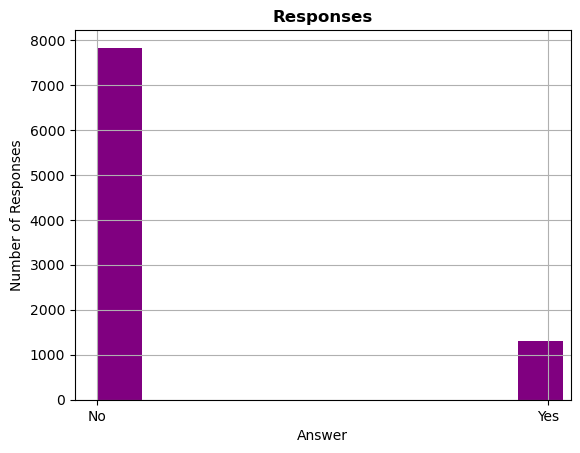

In [6]:
df['response'].hist(color='purple',bins=15,width=.1)
plt.xlabel('Answer')
plt.ylabel('Number of Responses')  
plt.title('Responses',
          fontweight ="bold")
plt.show()

<AxesSubplot:xlabel='response', ylabel='count'>

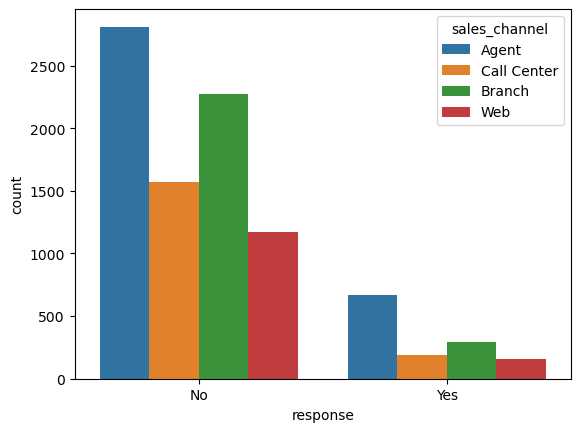

In [7]:
sns.countplot(data=df, x='response', hue='sales_channel')

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

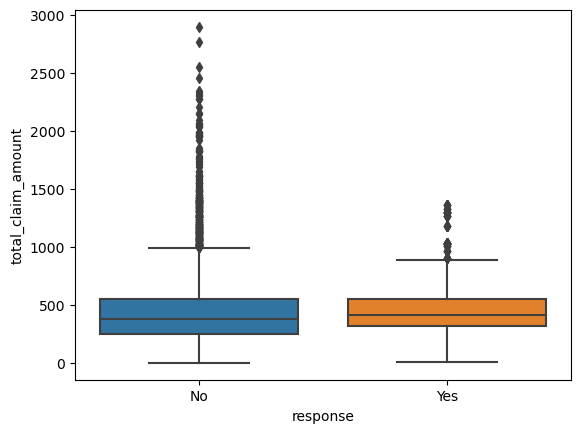

In [8]:
sns.boxplot(x='response',y='total_claim_amount',data=df)

<AxesSubplot:xlabel='response', ylabel='income'>

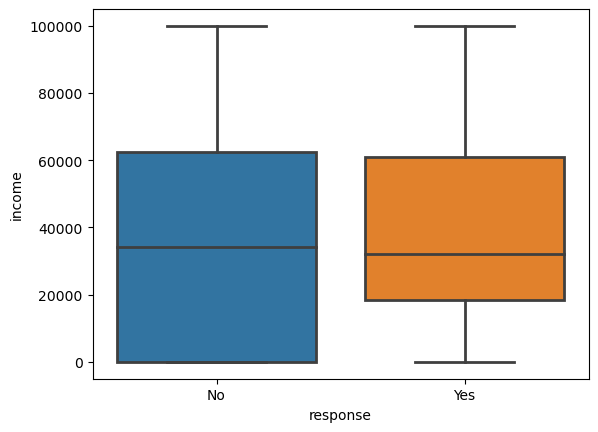

In [9]:
sns.boxplot(x='response',y='income',data=df, linewidth=2)

### 1.

In [16]:
data_numerical= df.select_dtypes(exclude=["object"])
data_numerical

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,2011-02-18,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,2011-01-18,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,2011-02-10,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,2011-01-11,49078,97,10.0,3,0.0,2,484.013411
6,5035.035257,2011-02-14,37405,63,8.0,99,3.0,4,287.556107
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,2011-01-07,59855,74,30.0,82,4.0,1,355.200000
10904,19228.463620,2011-02-24,0,187,14.0,32,0.0,2,897.600000
10906,5259.444853,2011-01-06,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,2011-02-06,39837,201,11.0,63,0.0,2,381.306996


In [20]:
from sklearn.model_selection import train_test_split
X=data_numerical[['customer_lifetime_value','effective_to_date', 'income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
Y=data_numerical['total_claim_amount']

### 2.

In [10]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

<AxesSubplot:xlabel='1', ylabel='Density'>

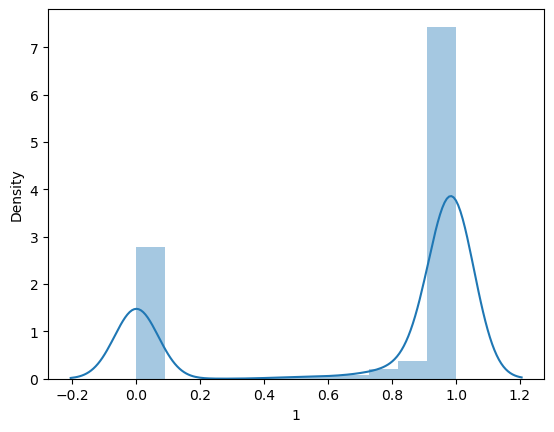

In [12]:
X_num=df.select_dtypes(include=np.number)
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X_num)
x_normalized=transformer.transform(X_num)
x_normalized_df=pd.DataFrame(x_normalized)
sns.distplot(x_normalized_df[1])

In [14]:
x_normalized_df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

<AxesSubplot:xlabel='0', ylabel='Density'>

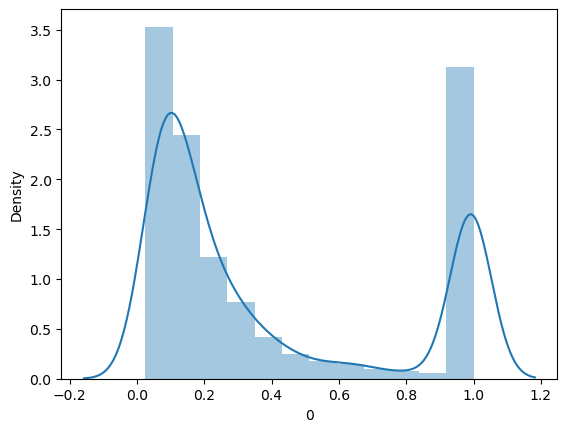

In [53]:
sns.distplot(data2.iloc[:,0])

<AxesSubplot:xlabel='1', ylabel='Density'>

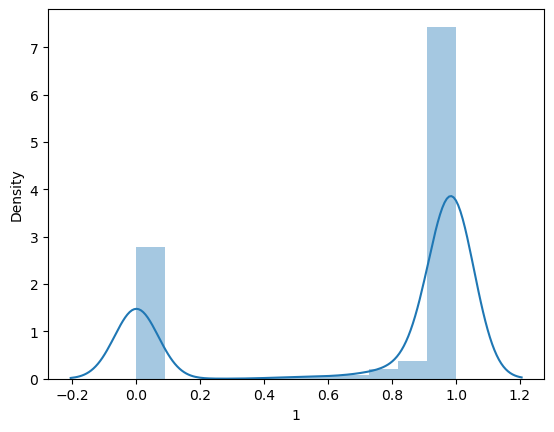

In [54]:
sns.distplot(data2.iloc[:,1])

<AxesSubplot:xlabel='2', ylabel='Density'>

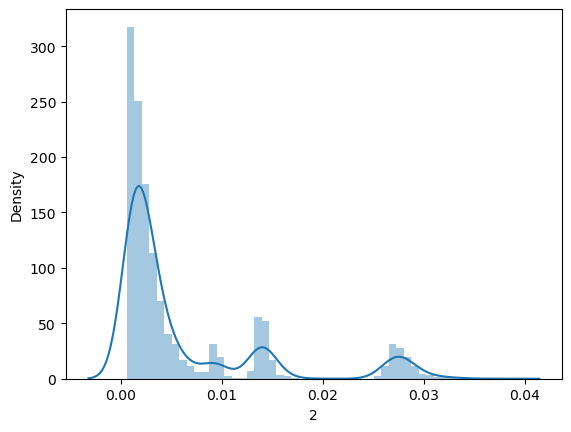

In [55]:
sns.distplot(data2.iloc[:,2])

<AxesSubplot:xlabel='3', ylabel='Density'>

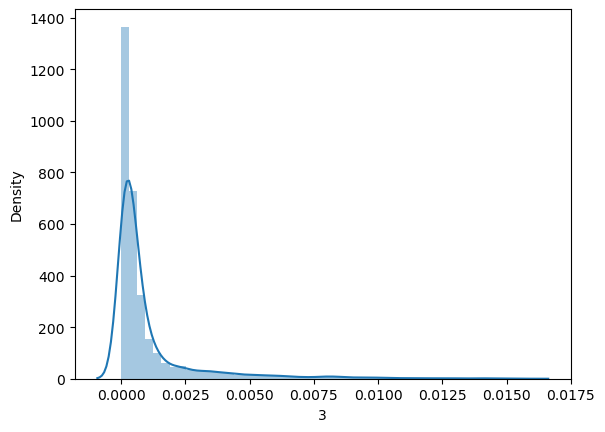

In [56]:
sns.distplot(data2.iloc[:,3])

<AxesSubplot:xlabel='4', ylabel='Density'>

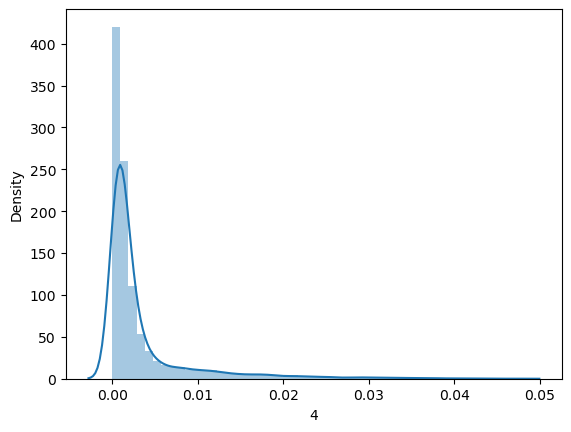

In [57]:
sns.distplot(data2.iloc[:,4])

<AxesSubplot:xlabel='5', ylabel='Density'>

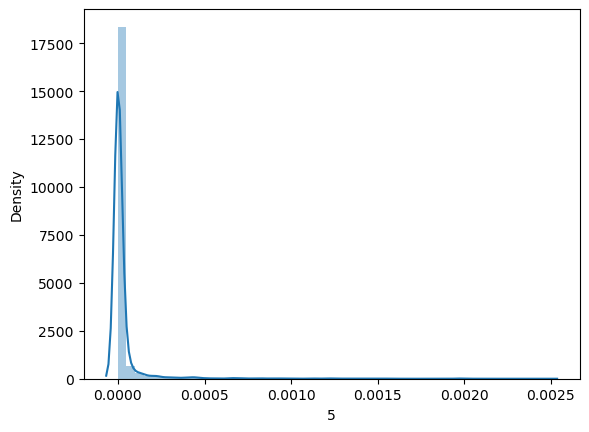

In [58]:
sns.distplot(data2.iloc[:,5])

<AxesSubplot:xlabel='6', ylabel='Density'>

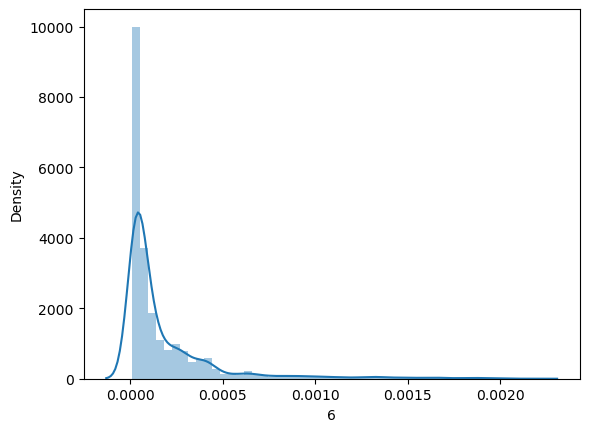

In [59]:
sns.distplot(data2.iloc[:,6])

<AxesSubplot:xlabel='7', ylabel='Density'>

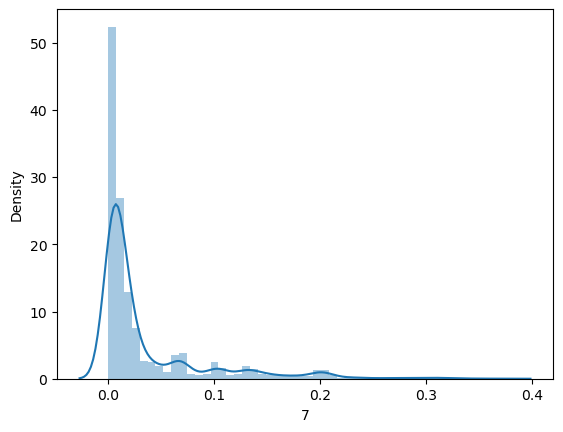

In [60]:
sns.distplot(data2.iloc[:,7])